In [1]:
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
import numpy as np

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Matplotlib params

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

### Loading dataset series from 1994 to 2021

In [25]:
df = pd.read_csv('1994-2021 - agrupacion por dia.csv', sep=';')

In [26]:
df

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1994-04-20,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,35.3,70:40,NaN,NaN,NaN,NaN,NaN
1,1994-04-21,0201D,BARCELONA,BARCELONA,6,12.4,0.0,10.0,05:20,14.8,Varias,17.0,3.9,7.5,17:40,NaN,1010.4,Varias,1002.7,02
2,1994-04-22,0201D,BARCELONA,BARCELONA,6,13.6,0.0,10.5,05:10,16.6,13:30,18.0,3.6,10.0,16:30,NaN,1010.2,Varias,1005.8,24
3,1994-04-23,0201D,BARCELONA,BARCELONA,6,15.5,1.4,12.6,05:45,18.4,17:55,21.0,4.4,12.5,16:50,NaN,1007.5,09,1005.1,04
4,1994-04-24,0201D,BARCELONA,BARCELONA,6,13.4,6.8,10.8,23:40,16.1,Varias,28.0,3.1,17.5,16:00,NaN,1008.6,24,1003.4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,2021-06-30,0201D,BARCELONA,BARCELONA,6,23.4,0.0,21.6,04:10,25.2,11:00,4.0,4.7,9.7,17:50,NaN,NaN,NaN,NaN,NaN
9270,2021-07-01,0201D,BARCELONA,BARCELONA,6,23.8,0.0,22.1,05:20,25.5,17:50,99.0,4.7,10.8,14:40,NaN,NaN,NaN,NaN,NaN
9271,2021-07-02,0201D,BARCELONA,BARCELONA,6,24.4,0.0,21.9,03:10,26.8,14:30,10.0,4.4,10.8,15:40,NaN,NaN,NaN,NaN,NaN
9272,2021-07-03,0201D,BARCELONA,BARCELONA,6,24.4,0.0,22.4,03:30,26.4,08:00,2.0,3.9,10.8,11:30,NaN,NaN,NaN,NaN,NaN


### Descripcipión de variables del Dataset

**Columna1**: Fecha en formato (aaaa-mm-dd) . Si lo abre con una hoja de cálculo, es posible que interprete el campo como fecha y lo vea en el formato habitual dd/mm/aaaa

**Columna2**: Identificador de Estación Meteorológica (Valor de 4 ó 5 caracteres)

**Columna3**: Nombre de la Estación

**Columna4**: Provincia en la que se encuentra

**Columna5**: Altitud (metros) sobre el nivel del mar

**Columna6**: Temperatura media diaria (ºC)

**Columna7**: Precipitación diaria de 07h a 07h (mm = l/m2) 

**Columna8**: Temperatura minima del día(ºC)

**Columna9**: Hora de Temperatura mínima (hh:mm UTC)

**Columna10**: Temperatura Máxima (ºC)

**Columna11**: Hora de Temperatura máxima (hh:mm UTC)

**Columna12**: Dirección de la racha máxima (decenas de grado)

**Columna13**: Velocidad media del viento (m/s)

**Columna14**: Racha máxima de viento (m/s)

**Columna15**: Hora y minuto Racha máxima de viento (hh:mm UTC) 

**Columna16**: Horas de Sol (horas)

**Columna17**: Presión máxima al nivel de referencia de la estación (hPa)

**Columna18**: Hora de la presión máxima (redondeada a la hora entera más próxima) (hora)

**Columna19**: Presión mínima al nivel de referencia de la estación (hPa)

**Columna20**: Hora de la presión mínima (redondeada a la hora entera más próxima) (hora)


---

# Exploración y preprocesamiento inicial del dataset

### Información detallada de dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 20 columns):
FECHA            9274 non-null datetime64[ns]
INDICATIVO       9274 non-null object
NOMBRE           9274 non-null object
PROVINCIA        9274 non-null object
ALTITUD          9274 non-null int64
TMEDIA           8845 non-null float64
PRECIPITACION    9274 non-null object
TMIN             8846 non-null float64
HORATMIN         8834 non-null object
TMAX             8849 non-null float64
HORATMAX         8833 non-null object
DIR              8950 non-null float64
VELMEDIA         9173 non-null float64
RACHA            8950 non-null float64
HORARACHA        8950 non-null object
SOL              0 non-null float64
PRESMAX          812 non-null float64
HORAPRESMAX      812 non-null object
PRESMIN          812 non-null float64
HORAPRESMIN      812 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(9)
memory usage: 1.4+ MB


### Exploración de valores disponibles en columna PRECIPITACIONES

##### Cantidad de valores diferentes

In [27]:
df.PRECIPITACION.nunique()

293

In [38]:
df.PRECIPITACION.value_counts().sort_values(ascending=False)

0.0     7049
0.1      211
0.2      103
0.3       83
0.4       80
        ... 
9.2        1
83.9       1
49.1       1
28.8       1
16.0       1
Name: PRECIPITACION, Length: 293, dtype: int64

##### Cantidad de NA's

In [29]:
df.isna().sum()

FECHA               0
INDICATIVO          0
NOMBRE              0
PROVINCIA           0
ALTITUD             0
TMEDIA            429
PRECIPITACION     353
TMIN              428
HORATMIN          440
TMAX              425
HORATMAX          441
DIR               324
VELMEDIA          101
RACHA             324
HORARACHA         324
SOL              9274
PRESMAX          8462
HORAPRESMAX      8462
PRESMIN          8462
HORAPRESMIN      8462
dtype: int64

##### Qué filas tienen NA y por qué?

In [40]:
df[df['PRECIPITACION'].isna()]

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1994-04-20,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,35.3,70:40,NaN,NaN,NaN,NaN,NaN
5,1994-04-25,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1994-04-27,0201D,BARCELONA,BARCELONA,6,16.8,NaN,13.8,01:00,19.7,09:40,NaN,NaN,NaN,NaN,NaN,1024.7,10,1022.4,Varias
54,1994-06-15,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,1994-07-11,0201D,BARCELONA,BARCELONA,6,25.4,NaN,23.0,04:40,27.9,Varias,6.0,2.5,6.4,17:20,NaN,1015.6,11,1013.6,Varias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,2016-04-28,0201D,BARCELONA,BARCELONA,6,13.6,NaN,11.6,01:00,15.5,16:00,9.0,4.7,11.4,07:40,NaN,NaN,NaN,NaN,NaN
7496,2016-08-20,0201D,BARCELONA,BARCELONA,6,25.4,NaN,23.7,06:00,27.2,11:40,9.0,6.9,12.8,12:30,NaN,NaN,NaN,NaN,NaN
7576,2016-11-10,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,29.0,1.1,9.4,10:00,NaN,NaN,NaN,NaN,NaN
8031,2018-02-08,0201D,BARCELONA,BARCELONA,6,3.6,NaN,1.1,13:00,6.1,10:40,8.0,2.8,10.0,12:20,NaN,NaN,NaN,NaN,NaN


##### Observamos los valores posibles para la variable

In [83]:
unique_values = df.PRECIPITACION.unique().tolist()
unique_values.sort()

In [84]:
unique_values

['0',
 '0.0',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1.0',
 '1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '10.0',
 '10.1',
 '10.2',
 '10.3',
 '10.5',
 '10.6',
 '10.7',
 '10.9',
 '109.3',
 '11.0',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '11.5',
 '11.6',
 '11.7',
 '11.8',
 '11.9',
 '111.9',
 '112.1',
 '112.6',
 '12.0',
 '12.1',
 '12.2',
 '12.3',
 '12.4',
 '12.5',
 '12.6',
 '12.7',
 '12.8',
 '12.9',
 '13.0',
 '13.1',
 '13.2',
 '13.3',
 '13.4',
 '13.5',
 '13.6',
 '13.7',
 '13.8',
 '13.9',
 '14.0',
 '14.1',
 '14.2',
 '14.3',
 '14.4',
 '14.5',
 '14.6',
 '14.7',
 '14.8',
 '15.0',
 '15.1',
 '15.2',
 '15.3',
 '15.4',
 '15.5',
 '15.6',
 '15.9',
 '16.0',
 '16.1',
 '16.2',
 '16.3',
 '16.4',
 '16.5',
 '16.6',
 '16.7',
 '16.8',
 '16.9',
 '17.0',
 '17.1',
 '17.2',
 '17.3',
 '17.4',
 '17.5',
 '17.6',
 '17.8',
 '17.9',
 '18.0',
 '18.2',
 '18.5',
 '18.7',
 '18.8',
 '18.9',
 '19.2',
 '19.5',
 '19.7',
 '19.8',
 '19.9',
 '2.0',
 '2.1',
 '2.2',
 '2.3

El valor 0 sí que existe, entonces descartamos la hipótesis de que todos los NA's sean necesariamente "0"

En principio procedemos por remplazar los NA por 0, pero más adelante se reemplazará por la media de cada mes a modo de ocasionar el menor impacto posible respecto a las métricas de agregación

##### Se procede a llenar los NA's con el valor 0

In [43]:
df['PRECIPITACION'].fillna(value=0, inplace=True)

##### Chequeo acerca de correcto reemplazo de NA's

In [44]:
df.PRECIPITACION.isna().sum()

0

### Conversion de formatos de variables: PRECIPITACION (FLOAT), FECHA (DATETIME)

##### PRECIPITACION COMO FLOAT

Al querer convertir la variable a FLOAT, me he dado cuenta que uno de los valores posibles es "ip". Procedo a buscar en qué filas se encuentra y su posible significado para detallar el tratamiento correspondiente de dicho valor

In [59]:
df.PRECIPITACION = df.PRECIPITACION.astype('float64')

ValueError: could not convert string to float: 'Ip'

In [61]:
df['PRECIPITACION'].str.contains('Ip').sum()

3

In [66]:
df.PRECIPITACION = df.PRECIPITACION.astype('str')

In [67]:
df[df['PRECIPITACION'].str.contains('Ip')]

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
3252,2004-07-06,0201D,BARCELONA,BARCELONA,6,22.5,Ip,20.7,05:10,24.3,12:40,8.0,3.1,13.9,02:20,NaN,NaN,NaN,NaN,NaN
3454,2005-01-24,0201D,BARCELONA,BARCELONA,6,NaN,Ip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3674,2005-09-01,0201D,BARCELONA,BARCELONA,6,25.0,Ip,23.1,05:20,26.8,12:40,19.0,2.8,6.4,14:40,NaN,NaN,NaN,NaN,NaN


##### Luego de buscar por internet, se llega a la conclusión que el valor "ip" está asociado a la terminología "imperceptible", o lo que es lo mismo, una lluvia muy pequeña

###### Siendo que como se observó previamente el valor más pequeño registrado es de 0,1, se procede a utilizar mismo valor

In [85]:
df['PRECIPITACION'] = df['PRECIPITACION'].replace(['Ip'],'0.1')

##### Procedemos nuevamente a convertir la variable en "Float"

In [86]:
df.PRECIPITACION = df.PRECIPITACION.astype('float64')

##### Conversión de FECHA a DATETIME 

In [88]:
df.FECHA = df.FECHA.astype('datetime64')

### Creación de variable "Año"

In [122]:
df['AÑO'] = df.FECHA.dt.year

### Creación de Variable "Mes"

In [90]:
df['MES'] = df.FECHA.dt.month

### Creación de Variable "Día del mes"

In [93]:
df['DIA_MES'] = df.FECHA.dt.day

### Creación de Variable "Día del año"

In [156]:
df['DIA_AÑO'] = df.FECHA.dt.dayofyear

### Creación de variable "Estación"

La determinación de cada estación está sujeta a la siguiente estructura de fechas: 
    Primavera: 20-03 a 20-06
    Verano: 21-06 a 21-09
    Otoño: 22-09 a 21-12
    Invierno: 22-12 a 19-03
    

primavera = (df['MES']>2)&(df['DIA_MES']>19)&(df['MES']<7)&(df['DIA_MES']<20)
verano = (df['MES']>5)&(df['DIA_MES']>20)&(df['MES']<10)&(df['DIA_MES']<21)
otoño = (df['MES']>8)&(df['DIA_MES']>21)&(df['MES']<=12)&(df['DIA_MES']<21)
invierno_a = ((df['MES']==12)&(df['DIA_MES']>20))
invierno_b = (df['MES']>0)&(df['DIA_MES']>0)&(df['MES']<4)&(df['DIA_MES']<21)
invierno = (invierno_a|invierno_b)

condition = [primavera, verano, otoño, invierno]
#condition = [(df['MONTH']>2)&(df['DIA_MES']>19)&(df['MONTH']<7)&(df['DIA_MES']<20), (df['MONTH']>5)&(df['DIA_MES']>20)&(df['MONTH']<10)&(df['DIA_MES']<21), (df['MONTH']>8)&(df['DIA_MES']>21)&(df['MONTH']<7)&(df['DIA_MES']<20), (((df['MONTH']>11)&(df['DIA_MES']>22)&(df['MONTH']<7)&(df['DIA_MES']<20)|(df['MONTH']>8)&(df['DIA_MES']>21)&(df['MONTH']<7)&(df['DIA_MES']<20)))] 
values = ['PRIMAVERA', 'VERANO', 'OTOÑO', 'INVIERNO']

df['ESTACION_AÑO'] = np.select(condition, values)

In [136]:
df.ESTACION_AÑO.value_counts()

0           7528
INVIERNO    1746
Name: ESTACION_AÑO, dtype: int64

def season_of_date(date):
    year = df.AÑO.astype('str')
    seasons = {'PRIMAVERA': pd.date_range(start=year+'/03/21', end=year+'/06/20'),
               'VERANO': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
               'OTOÑO': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
    if date in seasons['PRIMAVERA']:
        return 'PRIMAVERA'
    if date in seasons['VERANO']:
        return 'VERANO'
    if date in seasons['OTOÑO']:
        return 'OTOÑO'
    else:
        return 'INVIERNO'

 Assuming df has a date column of type `datetime`
df['ESTACION_AÑO'] = df['ESTACION_AÑO'].map(season_of_date)

##### Chequeamos que efectivamente sean 31 días los valores posibles

### Es necesario incluir también "Semana" del año?

---

# ANALISIS EXPLORATORIO

### Rango de días cubiertos por Dataset

In [99]:
print('fecha inicial: ', df.FECHA.min(), ', fecha final: ', df.FECHA.max())

fecha inicial:  1994-04-20 00:00:00 , fecha final:  2021-07-04 00:00:00


### Cantidad de días observados

In [104]:
print('Cantidad de días registrados: ', len(df))

Cantidad de días registrados:  9274


### Cantidad de observaciones para cada Mes

In [102]:
df.MES.value_counts()

5     861
7     800
10    800
6     793
12    786
1     781
8     773
11    761
4     748
3     737
9     730
2     704
Name: MES, dtype: int64

##### NOTA: Es extraño que algunos meses tengan muchas menos observaciones? Aquellos de 31 días en principio deberían coincidir. Analizar por qué no sucede!

##### Muy posiblemente se deba a que la finalización del período se corresponda con la mitad de año. Para que coincida se debería restar ese medio año en cuestión

### Cantidad de observaciones por cada día del mes

In [103]:
len(df.DIA_MES.value_counts())

31

In [105]:
df.DIA_MES.value_counts()

27    308
25    308
20    308
19    307
26    307
2     306
18    306
3     306
5     306
28    306
8     306
21    305
12    305
17    304
1     304
24    304
11    304
4     304
13    304
14    304
10    303
9     303
7     303
15    303
16    303
6     302
23    301
22    301
29    286
30    280
31    177
Name: DIA_MES, dtype: int64

### Registro de Precipitaciones por día

Text(0, 0.5, 'Cantidad de precipitaciones')

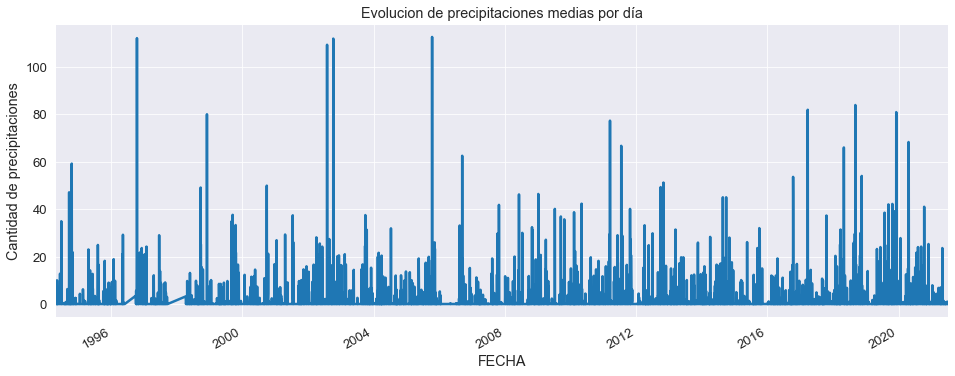

In [149]:
df.groupby('FECHA').mean()['PRECIPITACION'].plot(title='Evolucion de precipitaciones medias por día', grid=True, figsize=(16,6))
plt.ylabel('Cantidad de precipitaciones')

### Evolución de la temperatura en el tiempo 

Text(0, 0.5, 'Grados centigrados °C')

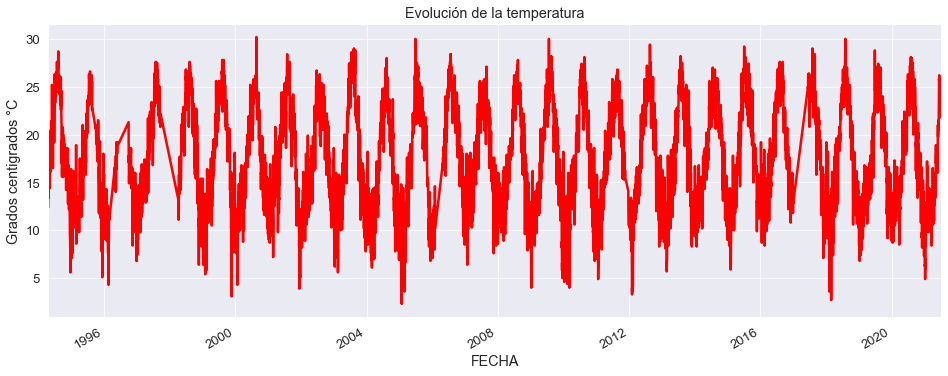

In [154]:
g = df[~df['TMEDIA'].isna()].groupby('FECHA').mean()['TMEDIA'].plot(color='red', grid=True, figsize=(16,6), title='Evolución de la temperatura')
g.set_ylabel('Grados centigrados °C')


### Evolución temperatura media por día del año (promedio 1994 a 2021)

Text(0, 0.5, 'Grados centigrados °C')

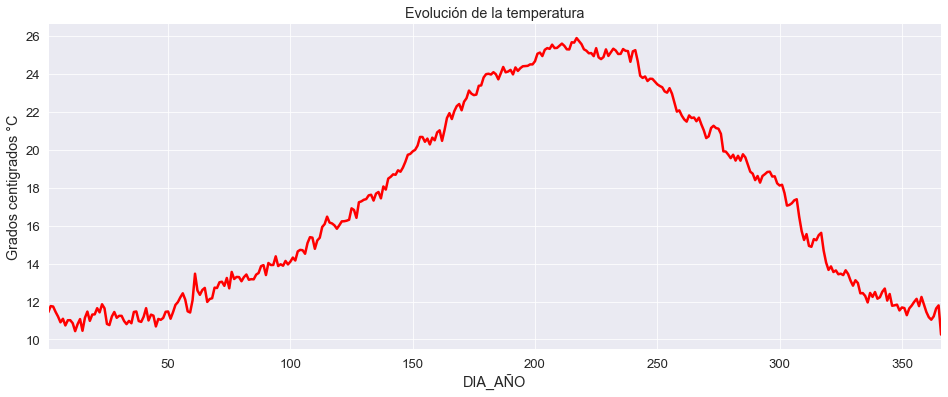

In [157]:
g = df[~df['TMEDIA'].isna()].groupby('DIA_AÑO').mean()['TMEDIA'].plot(color='red', grid=True, figsize=(16,6), title='Evolución de la temperatura')
g.set_ylabel('Grados centigrados °C')

### Evolución media movil 30 días temperatura

In [160]:
temperatura_df_mean = df.TMEDIA.rolling(window=3).mean()

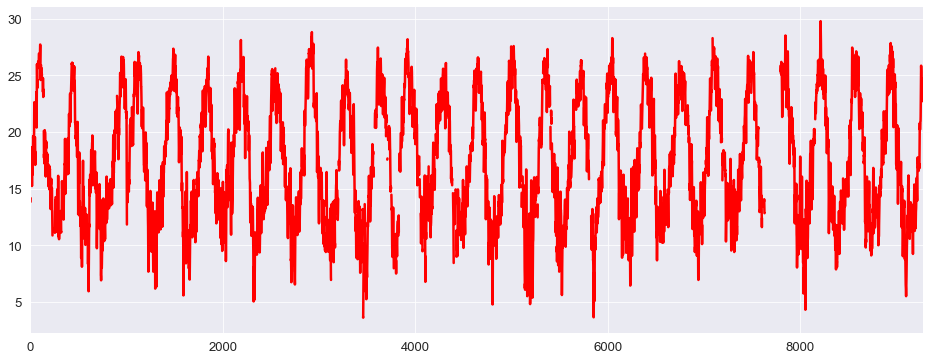

In [162]:
temperatura_df_mean.plot(color='red', grid=True, figsize=(16,6))